# Question 2 
**3 points**

**(a)** Use and modify the code *HW4_Question2_template* to explore which is the best classifier available in *scikit-learn* to discriminate the two classes of sequences you created in Question 1, i.e. the class of sequences generated by the logistic map, and the class of random sequences generated by permutation of the former.

You should test extensively at least **4** classifiers: the nearest neighbors classifier (given in the template); the neural network classifier; and two more of your choice. Change the parameters of the classifiers to improve their performance, explain what effect the parameters have on the classifier. 

Once again, explain extensively in several markdown cells your results, *using LaTeX whenever needed*. You should be able to fully convince the reader (with suitable plots) that indeed the classifier you choose is the best for your data.  

**(b)** Reduce the number of features, by sampling uniformly the columns of your training and testing data (by changing the value of the variable $step$ in the code).

For which value of $step$ does your best classifier fails to distinguish the two classes? Do the other classifiers you tested fare better for larger values of $step$? Can you justify why one classifier is performing better than another? What do your results say about the possibility of distinguishing random sequences from chaotic, deterministic ones?


**(c)** Device one further question to test the limits of machine learning classifiers on the data of this assignment. Answer your question. 

I will grade part **(c)** on the basis of whether your question is truly adding some new perspective to the strategy in **(a)** and **(b)**.


In [128]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# imports for the code

f = h5py.File('example_files.hdf5', 'r') #reading the file
TestData = f['TestArrays/TestData'] #Grabbing TestData array
TestTargets = f['TestArrays/TestTargets'] #Grabbing TestTargets array

TrainData = f["TrainingArrays/TrainingData"] #Grabbing Training Data
TrainTargets = f["TrainingArrays/TrainingTargets"] #Grabbing TrainingTargets

The code above shows my building blocks for the rest of the code. First i imported the different programs needed for the code. Then I opened the hdf5 file. I used the printall function on a seprate file to know how to extract the arrays from the hdf5 file. ('TestArrays/TestData',..., etc) Then grabbed the data and coped it onto a varibale which I will use for the upcoming graphs.

0.764


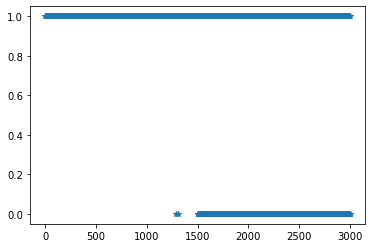

In [129]:
from sklearn.neighbors import KNeighborsClassifier #Import a classifier
clf = KNeighborsClassifier(3, weights='uniform') #define classifier
step=1 # step for function
clf.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=clf.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(clf.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

I imported KNeighborsClassifier which is a classifier that is from sklearn.neighbors. This classifier portrays the data in a score of 0.764. The score function calculates the balanced accuracy from a scale of zero to one. With one being the best. Generally below 0.6 is poor, between 0.7 and 0.9 is good, and above 0.9 being the best. This score is obviously is good but probably not the best for the dataset.

0.9276666666666666


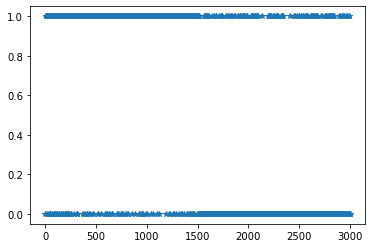

In [130]:
from sklearn.neural_network import MLPClassifier #Import a classifier
est = MLPClassifier(random_state=1, max_iter=300) #define classifier
step=1 # step for function
est.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=est.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(est.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

I imported MLPClassifier which is from sklearn.neural_network. We used the classifer to ultimately plot the graph and get our score based on accuracy. The MLPClassifer generated a result the is very good (a score above 0.9). We can clearly see discrepencies between the graphs between the first and second one, being the amount of points generated and, created almost full lines throughout the x axis.

0.7583333333333333


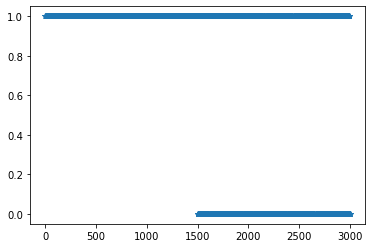

In [131]:
from sklearn.gaussian_process import GaussianProcessClassifier#Import a classifier
lst = GaussianProcessClassifier(random_state=0) #define classifier
step=1 # step for function
lst.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=lst.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(lst.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

I imported GaussianProcessClassifier which is from sklearn.gaussian_process. I found gauss logic to be very creative I wanted to see how classifier would match up against the rest. We see that this score is far worse than the MLPClassifier.

1.0


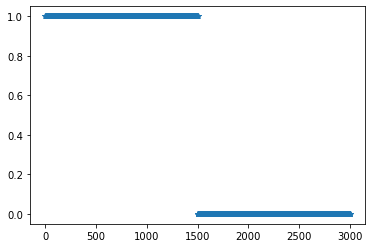

In [132]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #Import a classifier
tsk = QuadraticDiscriminantAnalysis() #define classifier
step=1 # step for function
tsk.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=tsk.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(tsk.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

I imported QuadraticDiscriminantAnalysis which is from sklearn.discriminant_analysis. This gemerated a perfect 1.0 . We can clearly say that the best classifier for our data is the QuadraticDiscriminantAnalysis, which totally through me off. The graph looks like a piecewise function, compared to the rest of them. 

Part (b)

0.48533333333333334


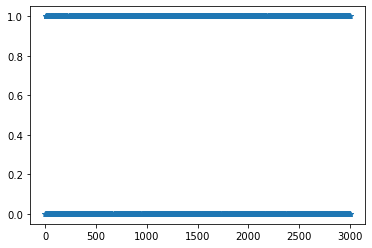

In [133]:
from sklearn.neighbors import KNeighborsClassifier #Import a classifier
clf = KNeighborsClassifier(3, weights='uniform') #define classifier
step=20 # step for function (changed to 20 here to check accuracy)
clf.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=clf.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(clf.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

0.49766666666666665


/Users/andrewhess/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


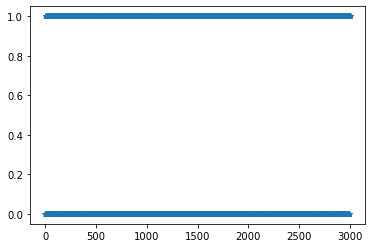

In [134]:
from sklearn.neural_network import MLPClassifier #Import a classifier
est = MLPClassifier(random_state=1, max_iter=300) #define classifier
step=20 # step for function (changed to 20 here to check accuracy)
est.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=est.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(est.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

0.492


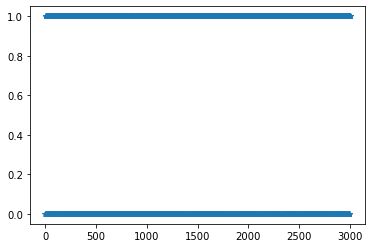

In [135]:
from sklearn.gaussian_process import GaussianProcessClassifier #Import a classifier
lst = GaussianProcessClassifier(random_state=0) # step for function (changed to 20 here to check accuracy)
step=20  # step for function (changed to 20 here to check accuracy)
lst.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=lst.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(lst.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

0.49166666666666664


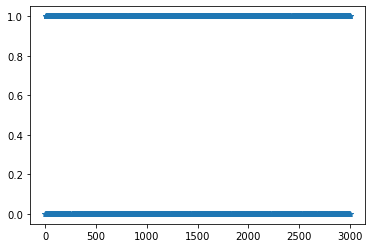

In [136]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #Import a classifier
tsk = QuadraticDiscriminantAnalysis() # step for function (changed to 20 here to check accuracy)
step=20 # step for function (changed to 20 here to check accuracy)
tsk.fit(TrainData[:,::step], TrainTargets[:]) #"Train" the function
score=tsk.score(TestData[:,::step],TestTargets[:]) #define score, which tells how accurate it is
plt.plot(tsk.predict(TestData[:,::step]),'*') #plotting the function
print(score) #printing score

MarkDown for all of Part (b):
We are asked to reduce the number of features by increasing the step size, After changing my step size for all of the function to 20, we can see huge differences in the score. Also the graphs all look the same. I can draw the conclusion that the size of the dataset matters in creating a classification. A dataset with a less than proficient amount of data will not provide an accurate reading of the score and will provide a graph that looks like the one above. The dataset with the step size of 20 feel like its approaching the value of 0.5. I don't see any correlating to link it though.

Part (c)

Now that I have explored these different classifiers, is there a function that will allow us to know which classifier is best for each scenario. I'm aware that some of the classifiers are suited for a particular type of graph, but when are talking about uncertain, unpredictable logistic functions, is there a function that can tell us which classifier to use when given a set amount of data?

Each classifier is doing something different to the graphs. Thats what changed the score value. This has me thinking, can we create a function that runs through all of the classifiers and compares the number of the score. This will undoubtably lead us to the best solution of this question. Though this might not be practicle, depending on the dataset or the amount of processing power needed to run the functio because we are loading a lot of information depending on the size of dataset. 